# Analysis of NYC Flight Trends in Python


In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import matplotlib.pyplot as plt


In [2]:
flights_df= pd.read_csv('flights.csv')

In [3]:
print(flights_df.shape) #Dimension of the data
print(flights_df.columns) #Names of all the columns in the dataset
print(flights_df.dtypes) #Datatype of each variable

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [4]:
flights_df.dest.unique()
flights_df.head(10) #An overview of the dataset

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## How many flights were there from NYC airports to Seattle in 2013?

In [6]:
flights_df['dest'][flights_df['dest']=='SEA'].value_counts()


SEA    3923
Name: dest, dtype: int64

--There were a total of 3923 flights from NYC to Seattle in 2013--

## How many airlines fly from NYC to Seattle?

In [8]:
flights_df['carrier'][flights_df['dest']=='SEA'].value_counts()

DL    1213
UA    1117
AS     714
B6     514
AA     365
Name: carrier, dtype: int64

There are a total of 5 airline carriers that fly from NYC to Seattle. The total number of flights for each of the airline carriers is as follows:
DL - 1213, UA- 1117, AS-714, B6-514, AA-365

## How many unique air planes fly from NYC to Seattle?

In [91]:
len((flights_df['tailnum'][flights_df['dest']=='SEA'].unique()))

936

There are a total of 936 unique air planes from NYC to Seattle.

## What is the average arrival delay for flights from NC to Seattle?

In [ ]:
flights_df['arr_delay'][flights_df['dest']=='SEA'].mean()

The average arrival delay for flights from NYC to Seattle is -1.099. The negative value implies that instead of a delay, flights arrive before the scheduled time by 1.099 units.

## What proportion of flights to Seattle come from each NYC airport?

In [106]:
f=flights_df[flights_df['dest']=='SEA'].groupby('origin').size()
print(f)
f_total=len(flights_df[flights_df.dest=='SEA'])
print("Proportion of flights from EWR to Seattle:", f.loc['EWR']/f_total)
print("Proportion of flights from JFK to Seattle:", f.loc['JFK']/f_total)

origin
EWR    1810
JFK    2075
dtype: int64
Proportion of flights from EWR to Seattle: 0.465894465894
Proportion of flights from JFK to Seattle: 0.534105534106


Total flights from EWR to Seattle: 1810
Proportion of flights from EWR to Seattle: 0.46
Total flights from JFK to Seattle: 2075
Proportion of flights from JFK to Seattle: 0.53

## Flights are often delayed. The following questions explore delay patterns:
## Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [95]:
print("Largest Average Departure Delay:")
df = flights_df.groupby(['month','day'], as_index=False).agg({'dep_delay':np.mean})
print(df.loc[df['dep_delay'].idxmax()])           

print("\nLargest Average Arrival Delay:")
df2=flights_df.groupby(['month','day'], as_index=False).agg({'arr_delay':np.mean})
print(df2.loc[df2['arr_delay'].idxmax()])

Largest Average Departure Delay:
month         3.000000
day           8.000000
dep_delay    83.536921
Name: 66, dtype: float64

Largest Average Arrival Delay:
month         3.000000
day           8.000000
arr_delay    85.862155
Name: 66, dtype: float64


The date 8/3/2013 (8th March 2013) has the largest average departure delay equal to 83.53 units.
The date 8/3/2013 (8th March 2013) has the largest arrival delay, equal to 85.86 units.

## What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [64]:
df = df.groupby(['day', 'month'],as_index=False).agg({'arr_delay':np.mean, 'dep_delay':np.mean})
df['total_delay'] = df['arr_delay'] + df['dep_delay']
df.sort_values('total_delay', ascending=False).head(1)

,day,month,arr_delay,dep_delay,total_delay
86,8,3,85.862155,83.536921,169.399077


The worst day to fly out of NYC in 2013 was 8th March 2013. The average arrival delay was 85.86units, the average departure delay was 83.54 units and the total delay was 169 units.

## Are there any seasonal patterns in departure delays for flights from NYC?

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64


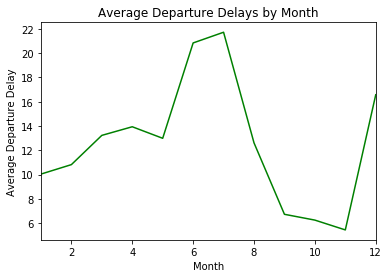

In [88]:
ds = flights_df.groupby('month')['dep_delay'].mean()
print(ds)
%matplotlib inline
ds.plot(title = 'Average Departure Delays by Month', color='green')
plt.ylabel('Average Departure Delay')
plt.xlabel('Month')

The average departure delay gradually increases from the month of January to July, followed by a decrease from August to November. Finally, there is an increase from December again. This signifies that certain seasonal factors may be responsible for decreasing departure delays in Fall and increasing departure delays in late Winter, Spring and Summer. Since the peak departure delays occur in Summer(June, July), other factors such as increased passenger traffic at airports (for holidaying) need to be explored for further analysis. 

## On average, how do departure delays vary over the course of a day?

hour
0.0     128.642452
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
24.0     64.862069
Name: dep_delay, dtype: float64


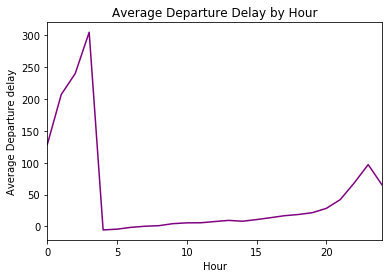

In [87]:
dt = flights_df.groupby('hour')['dep_delay'].mean()
print(dt)
dt.plot(title = 'Average Departure Delay by Hour', color='purple')
plt.xlabel('Hour')
plt.ylabel('Average Departure delay')

There is a rapid increase in departure delays betwen 12 AM and 3 AM followed by a steep decline from 3 AM to 4 AM. Again, from 4 AM onwards, there is a gradual rise till 9 PM, forming a small peak around 11 PM. Finally, the departure delay starts decreasing from 11 PM to 12 AM. This may be attributed to the assumption that there are fewer flights at the timeslot of 11 PM to 12 AM which causes the rapid decline in departure delays. 

## Which flight departing NYC in 2013 flew the fastest?

In [66]:
df = flights_df
df['speed'] = df['distance']/df['air_time']
df[df['speed']==df.speed.max()]

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077


The flight 1499 with tailnum N666DN belonging to carrier DL travelling from LGA to ATL has the highest speed. 
It covers a distance of 762 miles in 65 minutes and has a speed of 11.723 mph.

## Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [96]:
count=len(flights_df)
df = flights_df.groupby(['carrier', 'flight', 'dest']).size().reset_index(name='Size')
for i in df.index:
    if(df.loc[i]['Size']) == 365: # Since 2013 is not a leap year
        print("Carrier: %s, Flight: %s, Destination: %s" %(df.loc[i]['carrier'], df.loc[i]['flight'],
                                                           df.loc[i]['dest']))
    



Carrier: AA, Flight: 59, Destination: SFO
Carrier: AA, Flight: 119, Destination: LAX
Carrier: AA, Flight: 181, Destination: LAX
Carrier: AA, Flight: 1357, Destination: SJU
Carrier: AA, Flight: 1611, Destination: MIA
Carrier: B6, Flight: 219, Destination: CLT
Carrier: B6, Flight: 359, Destination: BUR
Carrier: B6, Flight: 371, Destination: FLL
Carrier: B6, Flight: 431, Destination: SRQ
Carrier: B6, Flight: 703, Destination: SJU
Carrier: B6, Flight: 1783, Destination: MCO
Carrier: DL, Flight: 2159, Destination: MCO
Carrier: DL, Flight: 2391, Destination: TPA
Carrier: EV, Flight: 5712, Destination: IAD
Carrier: UA, Flight: 15, Destination: HNL
Carrier: VX, Flight: 251, Destination: LAS
Carrier: VX, Flight: 407, Destination: LAX
Carrier: VX, Flight: 413, Destination: LAX


All the above 18 flights fly out of NYC every day.

## Which airline carrier has the best service in terms of the lowest average flight arrival and departure delays in June 2013?

HA 3.3
   carrier  arr_delay  dep_delay  total_delay
0       9E  22.511905  28.952978    51.464883
1       AA   6.481178  14.627778    21.108956
2       AS  -3.750000  13.083333     9.333333
3       B6  18.541319  20.392170    38.933488
4       DL  13.261829  18.735941    31.997770
5       EV  21.267975  25.496834    46.764809
6       F9  26.636364  29.436364    56.072727
7       FL  41.966805  38.806584    80.773389
8       HA   1.833333   1.466667     3.300000
9       MQ  23.143722  20.842342    43.986064
10      OO  68.500000  61.000000   129.500000
11      UA  12.794882  20.265377    33.060259
12      US  11.314095  10.404834    21.718929
13      VX  26.684760  28.412500    55.097260
14      WN  22.089286  30.514735    52.604020
15      YV  44.589744  42.794872    87.384615


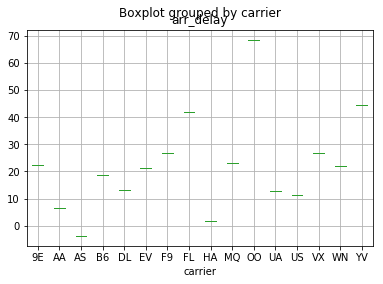

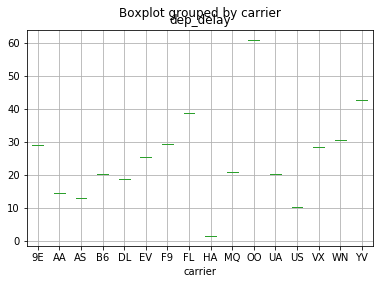

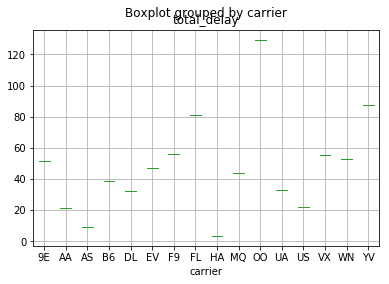

In [16]:
df = flights_df[flights_df['month']==6]
df = df.groupby('carrier',as_index=False).agg({'arr_delay':np.mean, 'dep_delay':np.mean})
df['total_delay'] = df['arr_delay'] + df['dep_delay']
for i in df.index:
    if df.loc[i]['total_delay'] == df['total_delay'].min():
        print(df.loc[i]['carrier'], df.loc[i]['total_delay'])
        
print(df)

%matplotlib inline

dt=df
dt.boxplot(column='arr_delay', by='carrier')

dx = df
dx.boxplot(column='dep_delay',by='carrier')

df.boxplot(column='total_delay', by='carrier')



The carrier Hawaiian Airlines(HA) has the best service in terms of lowest average arrival and departure delays in June 2013. The lowest total delay is 3.3 units. The carrier with the highest average total delay (arrival delay + departure delay) is OO with an average total delay of 129.5 units. Thus, we can classify SkyWest Airlines (OO) as the worst carrier in terms of average total delay.

From the plot, we can see that the total delay (arrival delay + departure delay) for Hawaiian Airlines (HA) is the lowest. The median and quartile range for United Airlines is the lowest among all the other carriers.  The median and quartile range for Skywest Airlines(OO) is the highest from each of the plots. 

## What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [5]:
% matplotlib inline
weather_df = pd.read_csv('weather.csv')
df = flights_df
#print(weather_df.head(10))
df_c = pd.merge(df,weather_df, on=['month','day','hour','origin'])
print(df_c.head(10))
plt.figure(0)
plt.plot(df_c.humid, df_c.dep_delay, 'r--')
plt.xlabel('Humidity')
plt.ylabel('Departure Delay')
plt.title('Departure Delay Vs. Humidity')
plt.figure(1)
plt.plot(df_c.temp, df_c.arr_delay)
plt.xlabel('Temperature')
plt.ylabel('Arrival Delay')
plt.title('Arrival Delay Vs. Temperature')


   Unnamed: 0_x  year_x  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0            20    2013      1    1     601.0        1.0     844.0       -6.0   
1            23    2013      1    1     606.0       -4.0     858.0      -12.0   
2            25    2013      1    1     607.0        0.0     858.0      -17.0   
3            26    2013      1    1     608.0        8.0     807.0       32.0   
4            30    2013      1    1     615.0        0.0     833.0       -9.0   
5            31    2013      1    1     622.0       -8.0    1017.0        3.0   
6            34    2013      1    1     624.0       -6.0     909.0       29.0   
7            38    2013      1    1     628.0       -2.0    1016.0       29.0   
8            41    2013      1    1     629.0       -1.0     824.0       -9.0   
9            42    2013      1    1     632.0       24.0     740.0       12.0   

  carrier tailnum  ...    year_y   temp   dewp  humid  wind_dir  wind_speed  \
0      B6  N644JB  ...      2

NameError: name 'plt' is not defined

After merging the flights and weather dataframes based on the columns month, day, hour and origin, two separate graphs have been plotted:

1. Departure Delay Vs. Humidity:
The Departure delay and Humidity plot indicates that there is a rise in departure delay as humidity increases till Humidity reaches the 50th unit. The departure delay reduces when humidity is between roughly 55-65 units. The graph is more or less constant except for the dip at the end. There are a lot of outliers. This signifies that there can be significantly high departure delays even when the humidity is not that high or low. This signifies that other factors such as wind speed, temperature, precipitation may be responsible for the numerous outliers. 

2. Arrival Delay Vs. Temperature:
The Arrival Delay and Temperature plot also indicates that there is a rise in arrival delay as temperature increases till roughly 35 units. There is a huge spike in Arrival delay at the 24-25th unit followed by the biggest spike in the 40th unit. The graph then remains more or less constant execpt for the dip at the end and a few spikes at the 45-55th unit, 64th, 85th and 9th units. Due to the significant dip in arrival delay at very high temperatures (90 units and above), we cannot conclude that there is a correlation between arrival delay and temperature. However, other factors may be responsible for the fluctuating arrival delay and the various spikes seen in the graph that we probably have not accounted for. Other factors not related to weather, such as waiting time at airports, passenger traffic, immigration queues etc. might have a significant effect on arrival delay which is beyond the purview of our dataset.